In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline
import pandas as pd

## Kinetics in the FES model
We use the denaturant dependent thermodynamics to estimate kinetics at different final denaturant concentrations.

In [2]:
R = 8.314e-3 # kJ/mol/K

In [3]:
from prefur import kinetics
DataBase = pd.read_excel('../prefur/data/newdatabase298Cm.xls')
kf1st = DataBase.kfexp*np.exp(-(DataBase.mfexp/(R*DataBase.Temp)*DataBase.D1st))
ku1st = DataBase.kuexp*np.exp((DataBase.muexp/(R*DataBase.Temp)*DataBase.D1st))

In [4]:
def ind_to_char(s):
    if s == 1:
        return "a"
    if s == 2:
        return "b"
    elif s == 3:
        return "ab"
nres = DataBase.SizePDB.as_matrix()
struct = DataBase.Structure.as_matrix()
kfold  = []
kunfold  = []
for n, s in zip(nres, struct):
    c = ind_to_char(s)
    kf, ku, FES = kinetics.predict(nres=n, struct=c)
    kfold.append(kf)
    kunfold.append(ku)

R(kf) = 0.7942


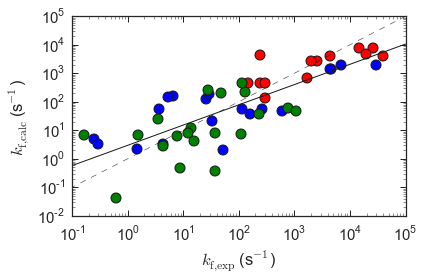

In [5]:
fig, ax = plt.subplots()
#ax.loglog(kf1st, kfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) \
           if DataBase.Structure[x]==i]
    ax.scatter(np.array(kf1st)[sel], np.array(kfold)[sel], \
               marker='o', s=100, facecolor=colors[i], lw=1)

ax.plot([1e-2,1e5],[1e-2,1e5], 'k', lw=0.5, ls='--')

z = np.polyfit(np.log10(kf1st), np.log10(kfold), 1)
p = np.poly1d(z)
x = np.array([-6.,5.])
ax.plot(10**x,10**p(x),"k-", lw=1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k_\mathrm{f,exp}$ (s$^{-1}$) ')
ax.set_ylabel(r'$k_\mathrm{f,calc}$ (s$^{-1}$) ')
ax.set_xlim(1e-1,1e5)
ax.set_ylim(1e-2,1e5)
plt.tight_layout()
print "R(kf) = %6.4f"%np.corrcoef(np.log10(kf1st), np.log10(kfold))[0][1]


R(ku) = 0.7313


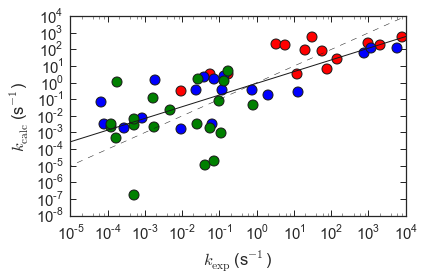

In [6]:
fig, ax = plt.subplots()
#ax.loglog(ku1st, kunfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) if DataBase.Structure[x]==i]
    ax.scatter(np.array(ku1st)[sel], np.array(kunfold)[sel], \
               marker='o', s=100, facecolor=colors[i], lw=1)

z = np.polyfit(np.log10(ku1st), np.log10(kunfold), 1)
p = np.poly1d(z)
x = np.array([-6.,5.])
ax.plot(10**x,10**p(x),"k-", lw=1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k_\mathrm{exp}$ (s$^{-1}$) ')
ax.set_ylabel(r'$k_\mathrm{calc}$ (s$^{-1}$) ')
plt.tight_layout()
ax.plot([1e-6,1e5],[1e-6,1e5], 'k', lw=0.5, ls='--')
ax.set_xlim(1e-5,1e4)
ax.set_ylim(1e-8,1e4)
print "R(ku) = %6.4f"%np.corrcoef(np.log10(ku1st), np.log10(kunfold))[0][1]

R(kf) = 0.7942
R(ku) = 0.7313


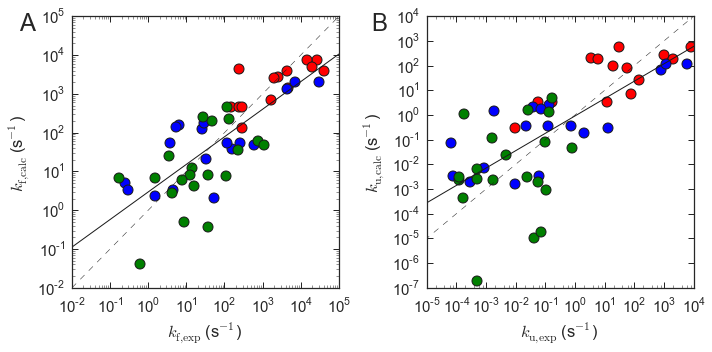

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
#ax.loglog(kf1st, kfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) \
           if DataBase.Structure[x]==i]
    ax[0].scatter(np.array(kf1st)[sel], np.array(kfold)[sel], \
               marker='o', s=100, facecolor=colors[i], lw=1)

ax[0].plot([1e-2,1e5],[1e-2,1e5], 'k', lw=0.5, ls='--')

z = np.polyfit(np.log10(kf1st), np.log10(kfold), 1)
p = np.poly1d(z)
x = np.array([-6.,5.])
ax[0].plot(10**x,10**p(x),"k-", lw=1)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$k_\mathrm{f,exp}$ (s$^{-1}$) ')
ax[0].set_ylabel(r'$k_\mathrm{f,calc}$ (s$^{-1}$) ')
ax[0].set_xlim(1e-2,1e5)
ax[0].set_ylim(1e-2,1e5)
print "R(kf) = %6.4f"%np.corrcoef(np.log10(kf1st), np.log10(kfold))[0][1]

#ax.loglog(ku1st, kunfold, 'o')
colors = [None, 'red', 'blue', 'green']
for i in range(1,4):
    sel = [x for x in range(len(DataBase.Structure)) if DataBase.Structure[x]==i]
    ax[1].scatter(np.array(ku1st)[sel], np.array(kunfold)[sel], \
               marker='o', s=100, facecolor=colors[i], lw=1)

z = np.polyfit(np.log10(ku1st), np.log10(kunfold), 1)
p = np.poly1d(z)
x = np.array([-6.,5.])
ax[1].plot(10**x,10**p(x),"k-", lw=1)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$k_\mathrm{u,exp}$ (s$^{-1}$) ')
ax[1].set_ylabel(r'$k_\mathrm{u,calc}$ (s$^{-1}$) ')

ax[1].plot([1e-6,1e5],[1e-6,1e5], 'k', lw=0.5, ls='--')
ax[1].set_xlim(1e-5,1e4)
ax[1].set_ylim(1e-7,1e4)
ax[0].annotate("A", xy=(-0.2, 0.95), fontsize=24, xycoords=ax[0].get_window_extent)
ax[1].annotate("B", xy=(-0.2, 0.95), fontsize=24, xycoords=ax[1].get_window_extent)

plt.tight_layout()
fig.savefig("predictions.png", dpi=300)

print "R(ku) = %6.4f"%np.corrcoef(np.log10(ku1st), np.log10(kunfold))[0][1]